# Simon & Garfunkel Lyric Generator

This notebook contains code for an MLP neural network that generates lyrics from the American rock due Simon & Garfunkel. Generation is done on a word-level basis. Lyrics are taken from [LINK HERE]

### Import Libraries

In [1]:
import re
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import nltk
from tqdm import tqdm
import torch.optim as optim
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Irish\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Irish\AppData\Roaming\nltk_data...


True

### Input

In [2]:
# Read input
filename = "edgar-allan-poe.txt"
f = open(filename, 'r')

raw_text = f.read()
raw_text

"In visions of the dark night\nI have dreamed of joy departed-\nBut a waking dream of life and light\nHath left me broken-hearted.\n\nAh! what is not a dream by day\nTo him whose eyes are cast\nOn things around him with a ray\nTurned back upon the past?\n\nThat holy dream- that holy dream,\nWhile all the world were chiding,\nHath cheered me as a lovely beam\nA lonely spirit guiding.\n\nWhat though that light, thro' storm and night,\nSo trembled from afar-\nWhat could there be more purely bright\nIn Truth's day-star?\n\nFrom childhood's hour I have not been\nAs others were; I have not seen\nAs others saw; I could not bring\nMy passions from a common spring.\nFrom the same source I have not taken\nMy sorrow; I could not awaken\nMy heart to joy at the same tone;\nAnd all I loved, I loved alone.\nThen- in my childhood, in the dawn\nOf a most stormy life- was drawn\nFrom every depth of good and ill\nThe mystery which binds me still:\nFrom the torrent, or the fountain,\nFrom the red cliff of

In [3]:
# Remove all non-ASCII characters
processed_text = re.sub(r'[^\x00-\x7f]', r'', raw_text)
processed_text

"In visions of the dark night\nI have dreamed of joy departed-\nBut a waking dream of life and light\nHath left me broken-hearted.\n\nAh! what is not a dream by day\nTo him whose eyes are cast\nOn things around him with a ray\nTurned back upon the past?\n\nThat holy dream- that holy dream,\nWhile all the world were chiding,\nHath cheered me as a lovely beam\nA lonely spirit guiding.\n\nWhat though that light, thro' storm and night,\nSo trembled from afar-\nWhat could there be more purely bright\nIn Truth's day-star?\n\nFrom childhood's hour I have not been\nAs others were; I have not seen\nAs others saw; I could not bring\nMy passions from a common spring.\nFrom the same source I have not taken\nMy sorrow; I could not awaken\nMy heart to joy at the same tone;\nAnd all I loved, I loved alone.\nThen- in my childhood, in the dawn\nOf a most stormy life- was drawn\nFrom every depth of good and ill\nThe mystery which binds me still:\nFrom the torrent, or the fountain,\nFrom the red cliff of

In [4]:
# Get word tokens from lyrics
word_tokens = word_tokenize(processed_text)
print(f"Number of word tokens: {word_tokens}")

Number of word tokens: ['In', 'visions', 'of', 'the', 'dark', 'night', 'I', 'have', 'dreamed', 'of', 'joy', 'departed-', 'But', 'a', 'waking', 'dream', 'of', 'life', 'and', 'light', 'Hath', 'left', 'me', 'broken-hearted', '.', 'Ah', '!', 'what', 'is', 'not', 'a', 'dream', 'by', 'day', 'To', 'him', 'whose', 'eyes', 'are', 'cast', 'On', 'things', 'around', 'him', 'with', 'a', 'ray', 'Turned', 'back', 'upon', 'the', 'past', '?', 'That', 'holy', 'dream-', 'that', 'holy', 'dream', ',', 'While', 'all', 'the', 'world', 'were', 'chiding', ',', 'Hath', 'cheered', 'me', 'as', 'a', 'lovely', 'beam', 'A', 'lonely', 'spirit', 'guiding', '.', 'What', 'though', 'that', 'light', ',', 'thro', "'", 'storm', 'and', 'night', ',', 'So', 'trembled', 'from', 'afar-', 'What', 'could', 'there', 'be', 'more', 'purely', 'bright', 'In', 'Truth', "'s", 'day-star', '?', 'From', 'childhood', "'s", 'hour', 'I', 'have', 'not', 'been', 'As', 'others', 'were', ';', 'I', 'have', 'not', 'seen', 'As', 'others', 'saw', ';',

In [5]:
# Get unique word tokens from word tokens
unique_words = sorted(list(set(word_tokens)))
print(f"Number of unique word tokens: {unique_words}")

Number of unique word tokens: ['!', "'", "'T", "'Twere", "'d", "'s", "'t", '(', ')', ',', '-', '.', ':', ';', '?', 'A', 'Ah', 'And', 'As', 'But', 'Came', 'Continuing-', 'Dreams', 'Eternity', 'For', 'From', 'Hath', 'Heaven', 'Hope', 'I', 'In', 'Its', 'Love-', 'My', 'Of', 'Oh', 'On', 'Or', 'Paradise', 'Shone', 'So', 'Than', 'That', 'The', 'Then-', 'To', 'Too', 'Truth', 'Turned', 'What', 'When', 'While', 'Yes', 'a', 'afar-', 'all', 'alone', 'an', 'and', 'apart', 'are', 'around', 'as', 'at', 'autumn', 'awaken', 'awakening', 'back', 'be', 'be-', 'beam', 'been', 'behind', 'beings', 'better', 'binds', 'birth', 'blue', 'bound', 'boyhood-', 'bright', 'bring', 'brings', 'broken-hearted', 'by', 'cast', 'chaos', 'cheered', 'chiding', 'childhood', 'chilly', 'cliff', 'climes', 'cloud', 'cold', 'coldly-', 'coloring', 'common', 'could', 'dark', 'dawn', 'day', 'day-star', 'deep', 'delirious', 'demon', 'departed-', 'depth', 'drawn', 'dream', 'dream-', 'dreamed', 'dreams', 'earth', 'eternally', 'every', 

In [6]:
# Create vocabulary of word tokens
word_vocabulary = unique_words
word_vocabulary

['!',
 "'",
 "'T",
 "'Twere",
 "'d",
 "'s",
 "'t",
 '(',
 ')',
 ',',
 '-',
 '.',
 ':',
 ';',
 '?',
 'A',
 'Ah',
 'And',
 'As',
 'But',
 'Came',
 'Continuing-',
 'Dreams',
 'Eternity',
 'For',
 'From',
 'Hath',
 'Heaven',
 'Hope',
 'I',
 'In',
 'Its',
 'Love-',
 'My',
 'Of',
 'Oh',
 'On',
 'Or',
 'Paradise',
 'Shone',
 'So',
 'Than',
 'That',
 'The',
 'Then-',
 'To',
 'Too',
 'Truth',
 'Turned',
 'What',
 'When',
 'While',
 'Yes',
 'a',
 'afar-',
 'all',
 'alone',
 'an',
 'and',
 'apart',
 'are',
 'around',
 'as',
 'at',
 'autumn',
 'awaken',
 'awakening',
 'back',
 'be',
 'be-',
 'beam',
 'been',
 'behind',
 'beings',
 'better',
 'binds',
 'birth',
 'blue',
 'bound',
 'boyhood-',
 'bright',
 'bring',
 'brings',
 'broken-hearted',
 'by',
 'cast',
 'chaos',
 'cheered',
 'chiding',
 'childhood',
 'chilly',
 'cliff',
 'climes',
 'cloud',
 'cold',
 'coldly-',
 'coloring',
 'common',
 'could',
 'dark',
 'dawn',
 'day',
 'day-star',
 'deep',
 'delirious',
 'demon',
 'departed-',
 'depth',
 'd

In [7]:
# Create index-word mappings 
indices_words = dict((index, word) for index, word in enumerate(word_vocabulary))
indices_words

{0: '!',
 1: "'",
 2: "'T",
 3: "'Twere",
 4: "'d",
 5: "'s",
 6: "'t",
 7: '(',
 8: ')',
 9: ',',
 10: '-',
 11: '.',
 12: ':',
 13: ';',
 14: '?',
 15: 'A',
 16: 'Ah',
 17: 'And',
 18: 'As',
 19: 'But',
 20: 'Came',
 21: 'Continuing-',
 22: 'Dreams',
 23: 'Eternity',
 24: 'For',
 25: 'From',
 26: 'Hath',
 27: 'Heaven',
 28: 'Hope',
 29: 'I',
 30: 'In',
 31: 'Its',
 32: 'Love-',
 33: 'My',
 34: 'Of',
 35: 'Oh',
 36: 'On',
 37: 'Or',
 38: 'Paradise',
 39: 'Shone',
 40: 'So',
 41: 'Than',
 42: 'That',
 43: 'The',
 44: 'Then-',
 45: 'To',
 46: 'Too',
 47: 'Truth',
 48: 'Turned',
 49: 'What',
 50: 'When',
 51: 'While',
 52: 'Yes',
 53: 'a',
 54: 'afar-',
 55: 'all',
 56: 'alone',
 57: 'an',
 58: 'and',
 59: 'apart',
 60: 'are',
 61: 'around',
 62: 'as',
 63: 'at',
 64: 'autumn',
 65: 'awaken',
 66: 'awakening',
 67: 'back',
 68: 'be',
 69: 'be-',
 70: 'beam',
 71: 'been',
 72: 'behind',
 73: 'beings',
 74: 'better',
 75: 'binds',
 76: 'birth',
 77: 'blue',
 78: 'bound',
 79: 'boyhood-',
 

In [8]:
# Create word-index mappings
word_indices = dict((word, index) for index, word in enumerate(word_vocabulary))
word_indices

{'!': 0,
 "'": 1,
 "'T": 2,
 "'Twere": 3,
 "'d": 4,
 "'s": 5,
 "'t": 6,
 '(': 7,
 ')': 8,
 ',': 9,
 '-': 10,
 '.': 11,
 ':': 12,
 ';': 13,
 '?': 14,
 'A': 15,
 'Ah': 16,
 'And': 17,
 'As': 18,
 'But': 19,
 'Came': 20,
 'Continuing-': 21,
 'Dreams': 22,
 'Eternity': 23,
 'For': 24,
 'From': 25,
 'Hath': 26,
 'Heaven': 27,
 'Hope': 28,
 'I': 29,
 'In': 30,
 'Its': 31,
 'Love-': 32,
 'My': 33,
 'Of': 34,
 'Oh': 35,
 'On': 36,
 'Or': 37,
 'Paradise': 38,
 'Shone': 39,
 'So': 40,
 'Than': 41,
 'That': 42,
 'The': 43,
 'Then-': 44,
 'To': 45,
 'Too': 46,
 'Truth': 47,
 'Turned': 48,
 'What': 49,
 'When': 50,
 'While': 51,
 'Yes': 52,
 'a': 53,
 'afar-': 54,
 'all': 55,
 'alone': 56,
 'an': 57,
 'and': 58,
 'apart': 59,
 'are': 60,
 'around': 61,
 'as': 62,
 'at': 63,
 'autumn': 64,
 'awaken': 65,
 'awakening': 66,
 'back': 67,
 'be': 68,
 'be-': 69,
 'beam': 70,
 'been': 71,
 'behind': 72,
 'beings': 73,
 'better': 74,
 'binds': 75,
 'birth': 76,
 'blue': 77,
 'bound': 78,
 'boyhood-': 79,
 

In [9]:
# Create x (input): Split lyrics into blocks, where each block has the same amount of words
# Create y (targets): For each x input, the y is the word that comes next
# The model should learn to predict y from the input x

block_size = 3
step = 1

x = []
y = []

for i in range(0, len(word_tokens) - block_size, step):
    x.append(word_tokens[i: i+block_size])
    y.append(word_tokens[i + block_size])

In [10]:
# Inspect x
x

[['In', 'visions', 'of'],
 ['visions', 'of', 'the'],
 ['of', 'the', 'dark'],
 ['the', 'dark', 'night'],
 ['dark', 'night', 'I'],
 ['night', 'I', 'have'],
 ['I', 'have', 'dreamed'],
 ['have', 'dreamed', 'of'],
 ['dreamed', 'of', 'joy'],
 ['of', 'joy', 'departed-'],
 ['joy', 'departed-', 'But'],
 ['departed-', 'But', 'a'],
 ['But', 'a', 'waking'],
 ['a', 'waking', 'dream'],
 ['waking', 'dream', 'of'],
 ['dream', 'of', 'life'],
 ['of', 'life', 'and'],
 ['life', 'and', 'light'],
 ['and', 'light', 'Hath'],
 ['light', 'Hath', 'left'],
 ['Hath', 'left', 'me'],
 ['left', 'me', 'broken-hearted'],
 ['me', 'broken-hearted', '.'],
 ['broken-hearted', '.', 'Ah'],
 ['.', 'Ah', '!'],
 ['Ah', '!', 'what'],
 ['!', 'what', 'is'],
 ['what', 'is', 'not'],
 ['is', 'not', 'a'],
 ['not', 'a', 'dream'],
 ['a', 'dream', 'by'],
 ['dream', 'by', 'day'],
 ['by', 'day', 'To'],
 ['day', 'To', 'him'],
 ['To', 'him', 'whose'],
 ['him', 'whose', 'eyes'],
 ['whose', 'eyes', 'are'],
 ['eyes', 'are', 'cast'],
 ['are', 'c

In [11]:
# Inspect y
y

['the',
 'dark',
 'night',
 'I',
 'have',
 'dreamed',
 'of',
 'joy',
 'departed-',
 'But',
 'a',
 'waking',
 'dream',
 'of',
 'life',
 'and',
 'light',
 'Hath',
 'left',
 'me',
 'broken-hearted',
 '.',
 'Ah',
 '!',
 'what',
 'is',
 'not',
 'a',
 'dream',
 'by',
 'day',
 'To',
 'him',
 'whose',
 'eyes',
 'are',
 'cast',
 'On',
 'things',
 'around',
 'him',
 'with',
 'a',
 'ray',
 'Turned',
 'back',
 'upon',
 'the',
 'past',
 '?',
 'That',
 'holy',
 'dream-',
 'that',
 'holy',
 'dream',
 ',',
 'While',
 'all',
 'the',
 'world',
 'were',
 'chiding',
 ',',
 'Hath',
 'cheered',
 'me',
 'as',
 'a',
 'lovely',
 'beam',
 'A',
 'lonely',
 'spirit',
 'guiding',
 '.',
 'What',
 'though',
 'that',
 'light',
 ',',
 'thro',
 "'",
 'storm',
 'and',
 'night',
 ',',
 'So',
 'trembled',
 'from',
 'afar-',
 'What',
 'could',
 'there',
 'be',
 'more',
 'purely',
 'bright',
 'In',
 'Truth',
 "'s",
 'day-star',
 '?',
 'From',
 'childhood',
 "'s",
 'hour',
 'I',
 'have',
 'not',
 'been',
 'As',
 'others',
 '

In [12]:
# Convert each word in y into their corresponding indices
y_ints = [word_indices[item] for item in y]
y_ints

[237,
 99,
 181,
 29,
 133,
 111,
 186,
 152,
 106,
 19,
 53,
 260,
 109,
 186,
 157,
 58,
 159,
 26,
 155,
 169,
 83,
 11,
 16,
 0,
 263,
 149,
 184,
 53,
 109,
 84,
 101,
 45,
 137,
 266,
 117,
 60,
 85,
 36,
 241,
 61,
 137,
 269,
 53,
 202,
 48,
 67,
 255,
 237,
 199,
 14,
 42,
 139,
 110,
 236,
 139,
 109,
 9,
 51,
 55,
 237,
 270,
 262,
 88,
 9,
 26,
 87,
 169,
 62,
 53,
 168,
 70,
 15,
 163,
 223,
 128,
 11,
 49,
 243,
 236,
 159,
 9,
 245,
 1,
 228,
 58,
 181,
 9,
 40,
 254,
 124,
 54,
 49,
 98,
 240,
 68,
 174,
 201,
 80,
 30,
 47,
 5,
 102,
 14,
 25,
 89,
 5,
 143,
 29,
 133,
 184,
 71,
 18,
 191,
 262,
 13,
 29,
 133,
 184,
 212,
 18,
 191,
 211,
 13,
 29,
 98,
 184,
 81,
 33,
 198,
 124,
 53,
 97,
 225,
 11,
 25,
 237,
 210,
 221,
 29,
 133,
 184,
 234,
 33,
 220,
 13,
 29,
 98,
 184,
 65,
 33,
 134,
 250,
 152,
 63,
 237,
 210,
 251,
 13,
 17,
 55,
 29,
 166,
 9,
 29,
 166,
 56,
 11,
 44,
 148,
 179,
 89,
 9,
 148,
 237,
 100,
 34,
 53,
 176,
 229,
 158,
 261,
 108,
 25,
 

In [13]:
# Create one-hot encoding of y
y_encoded = []

for item in y_ints:
    y_vector = np.zeros(len(unique_words))
    y_vector[item] = 1
    y_encoded.append(y_vector)

y_encoded = np.array(y_encoded)
y_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
# Create one-hot encoding of x
x_encoded = []

for x_arr in x:
    x_ints = [word_indices[item] for item in x_arr]
    
    x_row = []
    for item in x_ints:
        x_vector = np.zeros(len(unique_words))
        x_vector[item] = 1
        x_row.append(x_vector)
        
    x_encoded.append(x_row)
    
x_encoded = np.array(x_encoded)
x_encoded

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [15]:
class LyricGenerator(nn.Module):
    def __init__(self, input_dim, output_dim, block_size):
        super().__init__()

        # TODO: CHANGE SHAPES OF TENSORS LATER
        self.embeddings = nn.Linear(input_dim, 30 * block_size)
        self.hidden = nn.Linear(30 * block_size, 50)
        self.output = nn.Linear(50, output_dim)
        
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # f(x) = a(f(x))
        x = self.relu(self.embeddings(x))
        x = self.relu(self.hidden(x))
        y = self.sigmoid(self.output(x))
        y = self.softmax(y)

        return y

In [18]:
# Get size of input for training the model
input_size = x_encoded[0].ravel().shape[0]
input_size

816

In [19]:
# Instantiate model
model = LyricGenerator(input_size, len(unique_words), block_size)

# Print model configuration
model

LyricGenerator(
  (embeddings): Linear(in_features=816, out_features=90, bias=True)
  (hidden): Linear(in_features=90, out_features=50, bias=True)
  (output): Linear(in_features=50, out_features=272, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [20]:
# Create custom Dataset class
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
        self.n_samples = len(x)
    
    def __getitem__(self, index):
        return self.x[index].ravel(), self.y[index]
    
    def __len__(self):
        return self.n_samples

In [21]:
# Create x and y PyTorch tensors
device = 'cpu'
x = torch.tensor(x_encoded).float().to(device)
y = torch.tensor(y_encoded).float().to(device)

In [22]:
# Create training dataset using custom Dataset class
training_ds = CustomDataset(x, y)
training_ds

In [23]:
# Load training dataset into DataLoader
from torch.utils.data import DataLoader

batch_size = 5

train_loader = DataLoader(
    training_ds,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False
)

In [24]:
# Define model optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

In [25]:
# Define function to train model
def train_fn(loader, model, optimizer, loss_fn, device):
    loop = tqdm(loader)

    ave_loss = 0
    count = 0 
    for batch_idx, (data, targets) in enumerate(loop):
        data = data.to(device=device)
        targets = targets.to(device=device)
        
        # Forward
        predictions = model.forward(data)
        loss = loss_fn(predictions, targets)
        
        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Update tqdm loading bar
        loop.set_postfix(loss=loss.item())

        count += 1
        ave_loss += loss.item()
    
    ave_loss = ave_loss / count

    return ave_loss

In [26]:
# Train model
epochs = 100
average_losses = []

for epoch in range(epochs):
    print("Epoch: {}".format(epoch))
    ave_loss = train_fn(train_loader, model, optimizer, criterion, device)
    
    average_losses.append(ave_loss)
        
    print("Ave Loss: {}".format(ave_loss))

Epoch: 0


100%|███████████████████████████| 117/117 [00:00<00:00, 213.33it/s, loss=5.61]


Ave Loss: 5.605808730818268
Epoch: 1


100%|███████████████████████████| 117/117 [00:00<00:00, 218.23it/s, loss=5.61]


Ave Loss: 5.605798395270975
Epoch: 2


100%|███████████████████████████| 117/117 [00:00<00:00, 234.98it/s, loss=5.61]


Ave Loss: 5.605789881486159
Epoch: 3


100%|███████████████████████████| 117/117 [00:00<00:00, 216.84it/s, loss=5.61]


Ave Loss: 5.605779818999461
Epoch: 4


100%|███████████████████████████| 117/117 [00:00<00:00, 228.42it/s, loss=5.61]


Ave Loss: 5.605766785450471
Epoch: 5


100%|███████████████████████████| 117/117 [00:00<00:00, 211.98it/s, loss=5.61]


Ave Loss: 5.605748286614051
Epoch: 6


100%|███████████████████████████| 117/117 [00:00<00:00, 236.27it/s, loss=5.61]


Ave Loss: 5.605718840900649
Epoch: 7


100%|███████████████████████████| 117/117 [00:00<00:00, 206.58it/s, loss=5.61]


Ave Loss: 5.605668495862912
Epoch: 8


100%|███████████████████████████| 117/117 [00:00<00:00, 239.26it/s, loss=5.61]


Ave Loss: 5.605579127613296
Epoch: 9


100%|███████████████████████████| 117/117 [00:00<00:00, 210.21it/s, loss=5.61]


Ave Loss: 5.605423230391282
Epoch: 10


100%|███████████████████████████| 117/117 [00:00<00:00, 229.88it/s, loss=5.61]


Ave Loss: 5.605185916281154
Epoch: 11


100%|███████████████████████████| 117/117 [00:00<00:00, 206.60it/s, loss=5.61]


Ave Loss: 5.6049065589904785
Epoch: 12


100%|████████████████████████████| 117/117 [00:00<00:00, 233.56it/s, loss=5.6]


Ave Loss: 5.604646511566945
Epoch: 13


100%|████████████████████████████| 117/117 [00:00<00:00, 217.33it/s, loss=5.6]


Ave Loss: 5.604446203280718
Epoch: 14


100%|████████████████████████████| 117/117 [00:00<00:00, 197.52it/s, loss=5.6]


Ave Loss: 5.604309624076908
Epoch: 15


100%|████████████████████████████| 117/117 [00:00<00:00, 205.36it/s, loss=5.6]


Ave Loss: 5.60422018246773
Epoch: 16


100%|████████████████████████████| 117/117 [00:00<00:00, 202.01it/s, loss=5.6]


Ave Loss: 5.604160769372924
Epoch: 17


100%|████████████████████████████| 117/117 [00:00<00:00, 206.20it/s, loss=5.6]


Ave Loss: 5.604119549449693
Epoch: 18


100%|████████████████████████████| 117/117 [00:00<00:00, 191.84it/s, loss=5.6]


Ave Loss: 5.604089704334227
Epoch: 19


100%|████████████████████████████| 117/117 [00:00<00:00, 238.70it/s, loss=5.6]


Ave Loss: 5.6040670077006025
Epoch: 20


100%|████████████████████████████| 117/117 [00:00<00:00, 209.74it/s, loss=5.6]


Ave Loss: 5.604048993852404
Epoch: 21


100%|████████████████████████████| 117/117 [00:00<00:00, 203.14it/s, loss=5.6]


Ave Loss: 5.604034203749436
Epoch: 22


100%|████████████████████████████| 117/117 [00:00<00:00, 223.34it/s, loss=5.6]


Ave Loss: 5.6040215329227285
Epoch: 23


100%|████████████████████████████| 117/117 [00:00<00:00, 210.17it/s, loss=5.6]


Ave Loss: 5.604010471930871
Epoch: 24


100%|████████████████████████████| 117/117 [00:00<00:00, 222.74it/s, loss=5.6]


Ave Loss: 5.60400042982183
Epoch: 25


100%|████████████████████████████| 117/117 [00:00<00:00, 198.76it/s, loss=5.6]


Ave Loss: 5.603991129459479
Epoch: 26


100%|████████████████████████████| 117/117 [00:00<00:00, 230.22it/s, loss=5.6]


Ave Loss: 5.603982371142787
Epoch: 27


100%|████████████████████████████| 117/117 [00:00<00:00, 187.63it/s, loss=5.6]


Ave Loss: 5.603973914415408
Epoch: 28


100%|████████████████████████████| 117/117 [00:00<00:00, 219.60it/s, loss=5.6]


Ave Loss: 5.603965848939032
Epoch: 29


100%|████████████████████████████| 117/117 [00:00<00:00, 223.69it/s, loss=5.6]


Ave Loss: 5.603957930181781
Epoch: 30


100%|████████████████████████████| 117/117 [00:00<00:00, 237.37it/s, loss=5.6]


Ave Loss: 5.603950190747905
Epoch: 31


100%|████████████████████████████| 117/117 [00:00<00:00, 230.88it/s, loss=5.6]


Ave Loss: 5.603942642863999
Epoch: 32


100%|████████████████████████████| 117/117 [00:00<00:00, 227.91it/s, loss=5.6]


Ave Loss: 5.603935074602437
Epoch: 33


100%|████████████████████████████| 117/117 [00:00<00:00, 213.60it/s, loss=5.6]


Ave Loss: 5.6039275960025625
Epoch: 34


100%|████████████████████████████| 117/117 [00:00<00:00, 230.78it/s, loss=5.6]


Ave Loss: 5.603920035892063
Epoch: 35


100%|████████████████████████████| 117/117 [00:00<00:00, 220.24it/s, loss=5.6]


Ave Loss: 5.603912524687938
Epoch: 36


100%|████████████████████████████| 117/117 [00:00<00:00, 233.17it/s, loss=5.6]


Ave Loss: 5.6039048912178755
Epoch: 37


100%|████████████████████████████| 117/117 [00:00<00:00, 232.37it/s, loss=5.6]


Ave Loss: 5.603897164010594
Epoch: 38


100%|████████████████████████████| 117/117 [00:00<00:00, 238.48it/s, loss=5.6]


Ave Loss: 5.603889180044843
Epoch: 39


100%|████████████████████████████| 117/117 [00:00<00:00, 228.21it/s, loss=5.6]


Ave Loss: 5.603881110492934
Epoch: 40


100%|████████████████████████████| 117/117 [00:00<00:00, 205.22it/s, loss=5.6]


Ave Loss: 5.603872910524026
Epoch: 41


100%|████████████████████████████| 117/117 [00:00<00:00, 221.67it/s, loss=5.6]


Ave Loss: 5.603864502703023
Epoch: 42


100%|████████████████████████████| 117/117 [00:00<00:00, 226.49it/s, loss=5.6]


Ave Loss: 5.603856066353301
Epoch: 43


100%|████████████████████████████| 117/117 [00:00<00:00, 218.64it/s, loss=5.6]


Ave Loss: 5.6038474425291405
Epoch: 44


100%|████████████████████████████| 117/117 [00:00<00:00, 190.20it/s, loss=5.6]


Ave Loss: 5.603838545644385
Epoch: 45


100%|████████████████████████████| 117/117 [00:00<00:00, 227.85it/s, loss=5.6]


Ave Loss: 5.603829550946879
Epoch: 46


100%|████████████████████████████| 117/117 [00:00<00:00, 195.59it/s, loss=5.6]


Ave Loss: 5.603820226131341
Epoch: 47


100%|████████████████████████████| 117/117 [00:00<00:00, 215.19it/s, loss=5.6]


Ave Loss: 5.603810787200928
Epoch: 48


100%|████████████████████████████| 117/117 [00:00<00:00, 218.98it/s, loss=5.6]


Ave Loss: 5.603800899962074
Epoch: 49


100%|████████████████████████████| 117/117 [00:00<00:00, 221.48it/s, loss=5.6]


Ave Loss: 5.603790902683878
Epoch: 50


100%|████████████████████████████| 117/117 [00:00<00:00, 219.21it/s, loss=5.6]


Ave Loss: 5.603780746459961
Epoch: 51


100%|████████████████████████████| 117/117 [00:00<00:00, 194.59it/s, loss=5.6]


Ave Loss: 5.603770345704168
Epoch: 52


100%|████████████████████████████| 117/117 [00:00<00:00, 221.67it/s, loss=5.6]


Ave Loss: 5.603759716718625
Epoch: 53


100%|████████████████████████████| 117/117 [00:00<00:00, 190.54it/s, loss=5.6]


Ave Loss: 5.603748953240549
Epoch: 54


100%|████████████████████████████| 117/117 [00:00<00:00, 189.33it/s, loss=5.6]


Ave Loss: 5.603737977834848
Epoch: 55


100%|████████████████████████████| 117/117 [00:00<00:00, 191.02it/s, loss=5.6]


Ave Loss: 5.603726700839833
Epoch: 56


100%|████████████████████████████| 117/117 [00:00<00:00, 197.75it/s, loss=5.6]


Ave Loss: 5.603715207841661
Epoch: 57


100%|████████████████████████████| 117/117 [00:00<00:00, 206.55it/s, loss=5.6]


Ave Loss: 5.603703462160551
Epoch: 58


100%|████████████████████████████| 117/117 [00:00<00:00, 179.06it/s, loss=5.6]


Ave Loss: 5.603691398588001
Epoch: 59


100%|████████████████████████████| 117/117 [00:00<00:00, 212.42it/s, loss=5.6]


Ave Loss: 5.603678907084669
Epoch: 60


100%|████████████████████████████| 117/117 [00:00<00:00, 202.72it/s, loss=5.6]


Ave Loss: 5.603666032481398
Epoch: 61


100%|████████████████████████████| 117/117 [00:00<00:00, 202.54it/s, loss=5.6]


Ave Loss: 5.603652827760094
Epoch: 62


100%|████████████████████████████| 117/117 [00:00<00:00, 210.53it/s, loss=5.6]


Ave Loss: 5.603639260316506
Epoch: 63


100%|████████████████████████████| 117/117 [00:00<00:00, 204.47it/s, loss=5.6]


Ave Loss: 5.603625505398481
Epoch: 64


100%|████████████████████████████| 117/117 [00:00<00:00, 223.14it/s, loss=5.6]


Ave Loss: 5.603611273643298
Epoch: 65


100%|████████████████████████████| 117/117 [00:00<00:00, 200.78it/s, loss=5.6]


Ave Loss: 5.603596569126488
Epoch: 66


100%|████████████████████████████| 117/117 [00:00<00:00, 235.68it/s, loss=5.6]


Ave Loss: 5.603581542642708
Epoch: 67


100%|████████████████████████████| 117/117 [00:00<00:00, 205.53it/s, loss=5.6]


Ave Loss: 5.60356613713452
Epoch: 68


100%|████████████████████████████| 117/117 [00:00<00:00, 215.13it/s, loss=5.6]


Ave Loss: 5.603550332224267
Epoch: 69


100%|████████████████████████████| 117/117 [00:00<00:00, 217.76it/s, loss=5.6]


Ave Loss: 5.6035332965035725
Epoch: 70


100%|████████████████████████████| 117/117 [00:00<00:00, 205.83it/s, loss=5.6]


Ave Loss: 5.603515555715968
Epoch: 71


100%|████████████████████████████| 117/117 [00:00<00:00, 190.22it/s, loss=5.6]


Ave Loss: 5.603497676360301
Epoch: 72


100%|████████████████████████████| 117/117 [00:00<00:00, 189.34it/s, loss=5.6]


Ave Loss: 5.603479275336633
Epoch: 73


100%|████████████████████████████| 117/117 [00:00<00:00, 227.75it/s, loss=5.6]


Ave Loss: 5.603460462684305
Epoch: 74


100%|████████████████████████████| 117/117 [00:00<00:00, 202.55it/s, loss=5.6]


Ave Loss: 5.6034411854214135
Epoch: 75


100%|████████████████████████████| 117/117 [00:00<00:00, 203.91it/s, loss=5.6]


Ave Loss: 5.603421276451176
Epoch: 76


100%|████████████████████████████| 117/117 [00:00<00:00, 210.87it/s, loss=5.6]


Ave Loss: 5.6034010292118435
Epoch: 77


100%|████████████████████████████| 117/117 [00:00<00:00, 203.27it/s, loss=5.6]


Ave Loss: 5.603380125811976
Epoch: 78


100%|████████████████████████████| 117/117 [00:00<00:00, 204.86it/s, loss=5.6]


Ave Loss: 5.603358835236639
Epoch: 79


100%|████████████████████████████| 117/117 [00:00<00:00, 168.13it/s, loss=5.6]


Ave Loss: 5.603336864047581
Epoch: 80


100%|████████████████████████████| 117/117 [00:00<00:00, 206.96it/s, loss=5.6]


Ave Loss: 5.603314464927738
Epoch: 81


100%|████████████████████████████| 117/117 [00:00<00:00, 213.04it/s, loss=5.6]


Ave Loss: 5.6032915767441445
Epoch: 82


100%|████████████████████████████| 117/117 [00:00<00:00, 204.90it/s, loss=5.6]


Ave Loss: 5.6032682280255175
Epoch: 83


100%|████████████████████████████| 117/117 [00:00<00:00, 220.90it/s, loss=5.6]


Ave Loss: 5.603244312808045
Epoch: 84


100%|████████████████████████████| 117/117 [00:00<00:00, 207.19it/s, loss=5.6]


Ave Loss: 5.603219994112977
Epoch: 85


100%|████████████████████████████| 117/117 [00:00<00:00, 214.01it/s, loss=5.6]


Ave Loss: 5.603195121145656
Epoch: 86


100%|████████████████████████████| 117/117 [00:00<00:00, 203.26it/s, loss=5.6]


Ave Loss: 5.603169926211366
Epoch: 87


100%|████████████████████████████| 117/117 [00:00<00:00, 228.88it/s, loss=5.6]


Ave Loss: 5.603144274817573
Epoch: 88


100%|████████████████████████████| 117/117 [00:00<00:00, 207.70it/s, loss=5.6]


Ave Loss: 5.60311826885256
Epoch: 89


100%|████████████████████████████| 117/117 [00:00<00:00, 203.86it/s, loss=5.6]


Ave Loss: 5.603091908316327
Epoch: 90


100%|████████████████████████████| 117/117 [00:00<00:00, 215.35it/s, loss=5.6]


Ave Loss: 5.603065278795031
Epoch: 91


100%|████████████████████████████| 117/117 [00:00<00:00, 202.32it/s, loss=5.6]


Ave Loss: 5.603038388439733
Epoch: 92


100%|████████████████████████████| 117/117 [00:00<00:00, 222.11it/s, loss=5.6]


Ave Loss: 5.603011237250434
Epoch: 93


100%|████████████████████████████| 117/117 [00:00<00:00, 198.05it/s, loss=5.6]


Ave Loss: 5.6029839148888225
Epoch: 94


100%|████████████████████████████| 117/117 [00:00<00:00, 229.07it/s, loss=5.6]


Ave Loss: 5.6029564172793656
Epoch: 95


100%|████████████████████████████| 117/117 [00:00<00:00, 208.56it/s, loss=5.6]


Ave Loss: 5.602928813706097
Epoch: 96


100%|████████████████████████████| 117/117 [00:00<00:00, 216.93it/s, loss=5.6]


Ave Loss: 5.602900973752013
Epoch: 97


100%|████████████████████████████| 117/117 [00:00<00:00, 214.24it/s, loss=5.6]


Ave Loss: 5.602873137873462
Epoch: 98


100%|████████████████████████████| 117/117 [00:00<00:00, 227.78it/s, loss=5.6]


Ave Loss: 5.6028451145204725
Epoch: 99


100%|████████████████████████████| 117/117 [00:00<00:00, 216.59it/s, loss=5.6]

Ave Loss: 5.6028169811281385


In [27]:
# Create input seed for lyric generation
poem = ['I', 'could', 'dream']
x_ints = [word_indices[item] for item in poem]
x_vector = []

for item in x_ints:
    x_item = np.zeros(len(unique_words))
    x_item[item] = 1
    
    x_vector.append(x_item)

initial_input = torch.tensor([np.array([x_vector]).ravel()]).float()

output = model(initial_input)[0].detach().cpu().numpy()
output

C:\Users\Irish\AppData\Local\Temp\ipykernel_1660\3595567007.py:12: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:248.)
  initial_input = torch.tensor([np.array([x_vector]).ravel()]).float()


array([0.00766185, 0.00699095, 0.00311718, 0.00327085, 0.00311718,
       0.00312131, 0.00311724, 0.00311718, 0.00311718, 0.0084725 ,
       0.00311748, 0.00844626, 0.0033408 , 0.00351579, 0.0065652 ,
       0.00315889, 0.00311718, 0.00625889, 0.00631014, 0.00339624,
       0.00311718, 0.00311718, 0.00311718, 0.00311944, 0.00311738,
       0.0084539 , 0.00362622, 0.00317434, 0.00311718, 0.00845558,
       0.0046721 , 0.00311719, 0.00311718, 0.00485116, 0.00811104,
       0.00311718, 0.00311721, 0.00311725, 0.00311729, 0.00311718,
       0.00311718, 0.00311959, 0.00368618, 0.00311909, 0.00312057,
       0.00320758, 0.00311719, 0.00311718, 0.00312137, 0.00326899,
       0.00311718, 0.00311718, 0.00311718, 0.00846699, 0.00311933,
       0.00482512, 0.00311718, 0.00311718, 0.00844235, 0.00311718,
       0.00311724, 0.00311789, 0.00487753, 0.00311718, 0.00311739,
       0.00311718, 0.00311718, 0.00311718, 0.00621189, 0.00311718,
       0.00312788, 0.00816539, 0.00311718, 0.00311718, 0.00311

<BarContainer object of 272 artists>

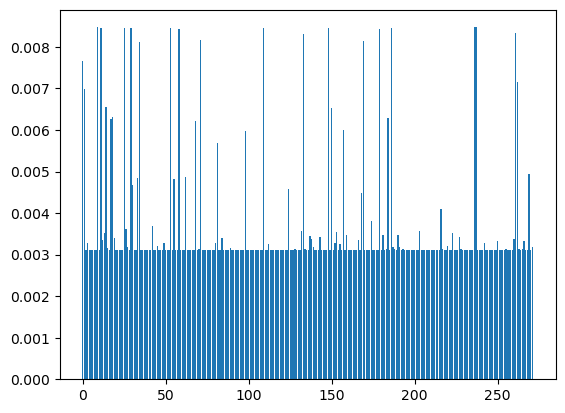

In [28]:
# Inspect probability distribution of word tokens
import matplotlib.pyplot as plt

plt.bar(range(len(output)), output)

In [29]:
# TODO: Create helper function to generate lyrics from model output